# Product data

All images seem to be of the same (200,200) dimensions, so no further umage scaling is necessary. 

In [8]:
# Imports
import os
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import json

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [26]:
import collections
from PIL import Image
import requests
from io import BytesIO

In [9]:
def walk_up_folder(path, depth=1):
    """
    Helper method to navigate the file system and get to the file location
    """
    _cur_depth = 1        
    while _cur_depth < depth:
        path = os.path.dirname(path)
        _cur_depth += 1
    return path

def save_fig(directory, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    """
    Method to save plots to the directory
    :param directory:
    :param fig_id:
    :param tight_layout:
    :param fig_extension:
    :param resolution:
    :return:
    """
    path = os.path.join(directory, fig_id + "." + fig_extension)
    log.info("Saving figure : " + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [16]:
data_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_data.json')
categories_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_categories.txt')

# Load and read the data

In [17]:
with open(categories_path, encoding='utf-8') as data_file:
    categories = data_file.read().split("\n")

In [22]:
print(categories)
print("Number of categories : {} ".format(len(categories)))

['Dresses', 'Tops', 'Jeans', 'Skirts', 'Rompers', 'Shoes', 'Bags', 'Jewelry', 'Swimwear', 'Intimates', 'Others']
Number of categories : 11 


In [23]:
with open(data_path, encoding='utf-8') as data_file:
    data = json.loads(data_file.read())

In [25]:
print("Number of data samples : {} ".format(len(data)))

Number of data samples : 1000 


In [28]:
data[0]['description']

"Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import."

In [30]:
data[0]['images_url']

'https://www.jcrew.com/s7-img-facade/H3588_PK6317_m?fmt=jpeg&qlt=90,0&resMode=sharp&op_usm=.1,0,0,0&wid=200&hei=200'

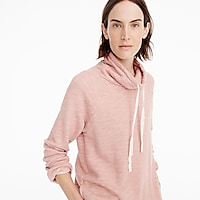

In [34]:
response = requests.get(data[0]['images_url'])
img = Image.open(BytesIO(response.content))
img

In [37]:
text_data_combined= [data[_]['description'] for _ in range(len(data))]

In [38]:
text_data_combined

["Supersoft speckled French terry makes this (tush covering!) turtleneck-sweatshirt hybrid the layering piece you'll want to wear to the gym, to lunch, to, well, everywhere this winter. Loose fit. Body length: 27 1/2. Cotton. Import.",
 'Consider this embroidered layer your new dressy sweatshirt this winter. Slim fit. Body length: 24. Cotton. Import.',
 "Shop the Men's Slim American Pima Cotton Oxford Shirt With Mechanical Stretch at J.Crew and see the entire selection of Men's Casual Shirts. Free Shipping Available.",
 "Shop the Women's Off-The-Shoulder Foldover Top at J.Crew and see the entire selection of Women's Knits. Free Shipping Available.",
 "Shop the Women's Ruffle Plunge V-Neck One-Piece Swimsuit at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Strappy Knit Midi Dress at J.Crew and see the entire selection of Women's Swimwear. Free Shipping Available.",
 "Shop the Women's Mixed Stripe T-Shirt at J.Crew and see the enti

In [41]:
len(text_data_combined)

1000

In [43]:
product_desc_path = os.path.join(walk_up_folder(os.getcwd(), depth=1),'Data/product_desc_only.txt') 

In [45]:
# Storing the text data into a separate file
with open(product_desc_path, "w", encoding='utf-8') as target:
    for _ in range(len(text_data_combined)):
        target.write(text_data_combined[_])
        target.write("\n")

Some of the text descriptions are in different languages like French but each sample has a product description without fail. This might not be the case usually when we encounter new products

In [ ]:
def plot_images(instances, images_per_row=10, **options):
    """
    Helper function to get a grid view of the images in the data
    """
    size = 200
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, **options)
    plt.axis("off")

In [ ]:
X=[]
for i in range(len(data)):
    try:
        response = requests.get(data[i]['images_url'])
        img = Image.open(BytesIO(response.content))
        X.append(img)
    except:
        pass

In [ ]:
len(X)

In [ ]:
plt.figure(figsize=(10,10))
example_images = X
plot_images(example_images, images_per_row=10)
save_fig("product_images")
plt.show()